## DANA 2021
## Stock to flow and macroeconomic indicators for the Bitcoin price

### Ignacio

## 1. Introduction
### 1.a) Scarcity in Bitcoin
Scarcity is a feature in assets that make its value time-resistant.

In [1]:
## fetch the Bitcoin Bitstamp price data
#api.dataset

In [2]:
## import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import seaborn as sns
sns.set_theme()

In [3]:
from datetime import datetime, timedelta

In [4]:
## set plotting paramenters as default for the rest of the notebook
plt.rcParams["figure.figsize"] = [10,4]
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rcParams.update({'legend.fontsize': 11})
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'font.size': 15})

In [5]:
## Bitcoin data kaggle (from 2016 to 2021)
data0 = pd.read_csv("BTC-USD (1).csv")
data0.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1823,2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,56099.519531,6.814546e+10
1824,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,57539.945313,5.189759e+10
1825,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,54207.320313,9.205242e+10
1826,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,1.061025e+11
1827,2021-02-24,50940.621094,51225.078125,47254.687500,50562.074219,50562.074219,7.704690e+10


In [6]:
## load bitstamp data (from 2012 to 2020)
data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv")
data["Date"] = [datetime.utcfromtimestamp(int(ttt)) for ttt in data["Timestamp"]]
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020-12-30 23:56:00
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020-12-30 23:57:00
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020-12-30 23:58:00
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020-12-30 23:59:00
4727776,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061,2020-12-31 00:00:00


In [7]:
## subsample daily data
def _daily_(x, cc="Date"):
    idx = []
    n, m = np.shape(x)  ## data dimensions
    for iidd, xi in enumerate(x[cc]):
        if (xi. hour == 0) and (xi.minute == 0) and (xi.second == 0):
            idx.append(iidd)
            
    df = x.iloc[idx]
    return df.reset_index().drop("index", axis=1)

In [8]:
## daily data
Xday0 = _daily_(data)

In [9]:
Xday0

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01
1,1325462400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-02
2,1325548800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-03
3,1325635200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-04
4,1325721600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-05
...,...,...,...,...,...,...,...,...,...
3279,1609027200,26472.89,26521.17,26472.89,26521.17,2.044165,54205.982230,26517.419665,2020-12-27
3280,1609113600,26242.82,26374.02,26242.81,26341.08,4.182292,109849.671690,26265.425649,2020-12-28
3281,1609200000,27037.90,27067.42,27027.12,27027.12,2.282142,61709.545293,27040.183772,2020-12-29
3282,1609286400,27370.00,27411.00,27362.63,27402.54,8.174570,224012.981480,27403.641319,2020-12-30


In [10]:
## merge daily datasets (bitstamp and kaggle)
for ni, i in enumerate(data0["Date"]): 
    if (str(data0["Date"][ni]) == str(Xday0["Date"].iloc[[-1]].values[0])[:10]):
        idx_merge = ni
        
## change column name
Xday0.rename(columns={"Volume_(Currency)":"Volume"}, inplace = True)
a1 = Xday0[["Date", "Open", "High", "Low", "Close", "Volume"]]
a2 = data0.iloc[range(idx_merge+1, data0.index[-1]+1)][["Date", "Open", "High", "Low", "Close", "Volume"]]

Xday = pd.concat([a1, a2])
Xday = Xday.reset_index().drop("index", axis=1)

## convert all dates to datetime.datetime
DT = []
for dt in Xday["Date"]:
    if (len(str(dt)) < 19):
        dti = datetime.strptime(str(dt)+ " 00:00:00", '%Y-%m-%d %H:%M:%S')
        DT.append(dti)
    else:
        dti = datetime.strptime(str(dt), '%Y-%m-%d %H:%M:%S')
        DT.append(dti)
        
Xday["Date"] = DT  ## all date values are datetime.datetime

In [11]:
Xday

,Date,Open,High,Low,Close,Volume
0,2012-01-01,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,NaN,NaN,NaN,NaN,NaN
3,2012-01-04,NaN,NaN,NaN,NaN,NaN
4,2012-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3334,2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,6.814546e+10
3335,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,5.189759e+10
3336,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,9.205242e+10
3337,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,1.061025e+11


## 2.  Pi cycle
We compute the $\pi$-cycle based on a long and short moving averages (MAs). The condition for the choice of the daily range for the MAs a one combination which ratio approximates to $\pi$, this is

\begin{align*}
\frac{\text{MA}^*_{\text{long}}}{\text{MA}_{\text{short}}} = \frac{\text{MA}^*(x, \tau=350)}{\text{MA}(x, \tau=111)} \approx \pi \\
\text{MA}(x, \tau) = \left(\text{MA}_1(x_1, \tau),\; \text{MA}_2(x_2, \tau),\; \ldots,\; \text{MA}_n(x_n, \tau) \right)
\end{align*}

where $\text{MA}$ is the simple moving average function for the price $x$ and price lag $\tau$. The MA at the $i$-th time point is computed as

\begin{align*}
\text{MA}_i(x, \tau) = \frac{1}{\tau}\sum_{k=-\tau}^{i}x_i
\end{align*}

In [12]:
## calcuate pi cycle 350
def pi_cycle(dat, cc="Close"):
    x = dat[cc]
    lng = 350
    srt = 111
    
    L, S = [np.NaN]*lng, [np.NaN]*srt
    
    ## calculate short and long cycles
    for ll in range(len(x[lng:])):
        li = np.sum(x[ll:ll+lng])
        L.append(li)
        
    for ss in range(len(x[srt:])):
        si = np.sum(x[ss:ss+srt])
        S.append(si)
    
    return np.array(L)*2/lng, np.array(S)/srt

In [13]:
## compute daily pi cylce 350
L, S = pi_cycle(Xday)
Xday["Long_Pi"] = L
Xday["Short_Pi"] = S

In [14]:
## save as csv
#Xday.to_csv("Xday.csv")

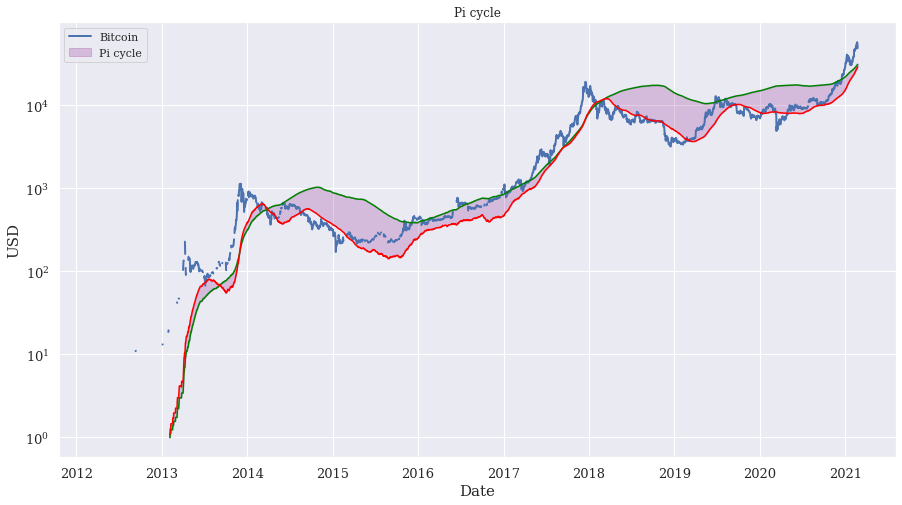

In [15]:
## seaborn plot
i0 = 0
f0 = -1

fig1, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=Xday[i0:f0], y="Close", x="Date", label="Bitcoin", lw=2)
sns.lineplot(data=Xday[i0+400:f0], y="Long_Pi", x="Date", color="green")
sns.lineplot(data=Xday[i0+400:f0], y="Short_Pi", x="Date", color="red")
plt.fill_between(Xday["Date"][i0+400:f0], Xday["Long_Pi"][i0+400:f0], Xday["Short_Pi"][i0+400:f0], color="purple", alpha=0.2, label="Pi cycle")
ax.set(yscale="log", ylabel="USD")
ax.set_title("Pi cycle")
ax.legend()

##plt.savefig("Fig01.png", dpi=300)

## 3. Price dynamics

In [16]:
## calculate price percentage-change
def price_percentage_change(x, O="Open", C="Close"):
    xOpen = np.array(x[O])
    xClose = np.array(x[C])
    return (xClose/xOpen - 1)

In [17]:
Xday["Percentage"] = price_percentage_change(Xday)

In [18]:
## price velocity and acceleration

def _dynamics_(dat, cc="Percentage"):
    xi = dat[cc]
    v = [np.nan]
    a = [np.nan]
    
    v += list(np.diff(xi))
    a += list(np.diff(v))
    
    return np.array(v), np.array(a)

In [19]:
## compute velocity and acceleration
v, a = _dynamics_(Xday)
Xday["Velocity"] = v
Xday["Acceleration"] = a


## magnitude
Xday["V2"] = v*v
Xday["A2"] = a*a

In [20]:
Xday.head()

,Date,Open,High,Low,Close,Volume,Long_Pi,Short_Pi,Percentage,Velocity,Acceleration,V2,A2
0,2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Velocity')

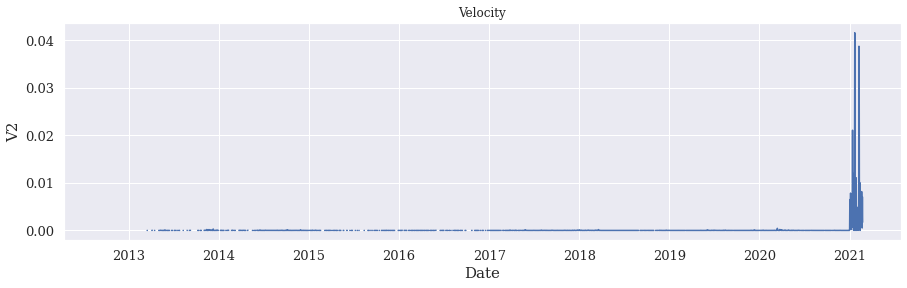

In [21]:
## plot velocity
i0 = 0
f0 = -1

fig2, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=Xday[i0:f0], y="V2", x="Date")
ax.set_title("Velocity")

Text(0.5, 1.0, 'Acceleration')

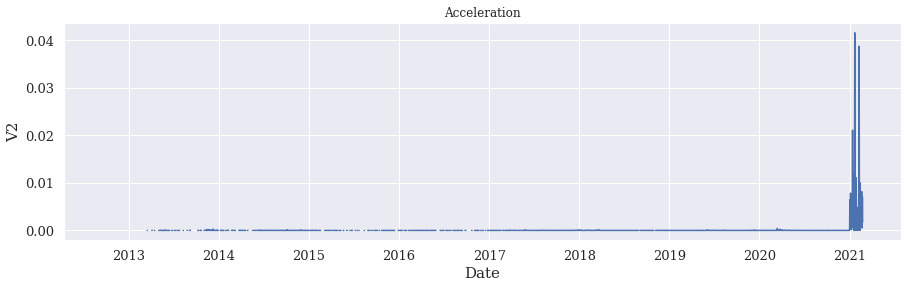

In [22]:
## plot velocity
i0 = 0
f0 = -1

fig2, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=Xday[i0:f0], y="V2", x="Date")
ax.set_title("Acceleration")

Text(0.5, 1.0, 'Price percentage change')

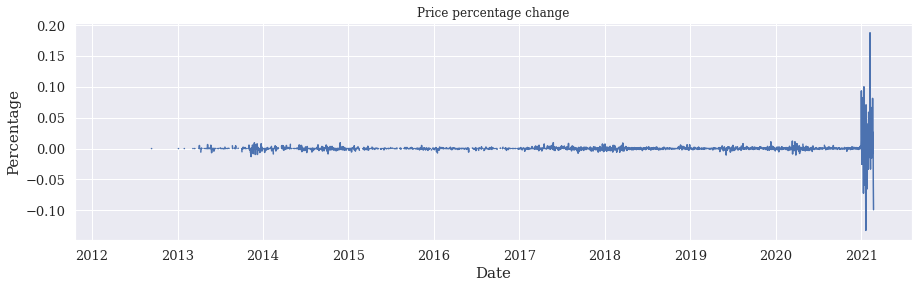

In [23]:
## plot percentage
i0 = 0
f0 = -1

fig3, ax = plt.subplots(figsize=(15,4))
#sns.lineplot(data=Xday[i0:f0], y="Close", x="Date")
#ax.set(yscale="log")
sns.lineplot(data=Xday[i0:f0], y="Percentage", x="Date")
ax.set_title("Price percentage change")

## 4 . S&P500

In [24]:
## load s&p500
SP = pd.read_csv("SP500.csv")

## convert time to same format of Bitcoin data
SP["Date"] = [datetime.strptime(dte+" 00:00:00", '%Y-%m-%d %H:%M:%S') for dte in SP["Date"]]
SP.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5164,2020-07-14,3141.110107,3200.949951,3127.659912,3197.520020,3197.520020,4476170000
5165,2020-07-15,3225.979980,3238.280029,3200.760010,3226.560059,3226.560059,4669760000
5166,2020-07-16,3208.360107,3220.389893,3198.590088,3215.570068,3215.570068,3961230000
5167,2020-07-17,3224.209961,3233.520020,3205.649902,3224.729980,3224.729980,3993830000
5168,2020-07-20,3224.290039,3258.610107,3215.159912,3251.840088,3251.840088,3971200000


In [25]:
## nan padder
def pad_nan(x, cc="Close", t0=Xday["Date"][Xday.iloc[[0]].index[0]], tf=Xday["Date"][Xday.iloc[[-1]].index[0]]):
    xd = x["Date"]
    BTC = Xday["Date"]

    #df = pd.DataFrame(np.nan, index=list(range(t0, tf)), columns=cc)
    idx = []
    
    for i in range(len(BTC)):
        try:
            iid = x[cc][xd == BTC[i]].index[0]
            val = x[cc].iloc[[iid]]
            idx.append(float(val))
        except:
            idx.append(np.nan)
            
    #price = x["Close"].iloc[[idx]]
    return idx#pd.DataFrame(price, columns=cc)

In [26]:
Xday["SP500"] = pad_nan(SP)
Xday.tail()

,Date,Open,High,Low,Close,Volume,Long_Pi,Short_Pi,Percentage,Velocity,Acceleration,V2,A2,SP500
3334,2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,6.814546e+10,30325.623534,27822.559626,0.003797,-0.077714,-0.168070,0.006039,0.028247,NaN
3335,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,5.189759e+10,30593.873131,28204.189621,0.026242,0.022446,0.100160,0.000504,0.010032,NaN
3336,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,9.205242e+10,30871.890019,28598.433543,-0.057800,-0.084043,-0.106489,0.007063,0.011340,NaN
3337,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,1.061025e+11,31135.661278,28964.431384,-0.099262,-0.041462,0.042581,0.001719,0.001813,NaN
3338,2021-02-24,50940.621094,51225.078125,47254.687500,50562.074219,7.704690e+10,31369.280225,29277.752157,-0.007431,0.091831,0.133293,0.008433,0.017767,NaN


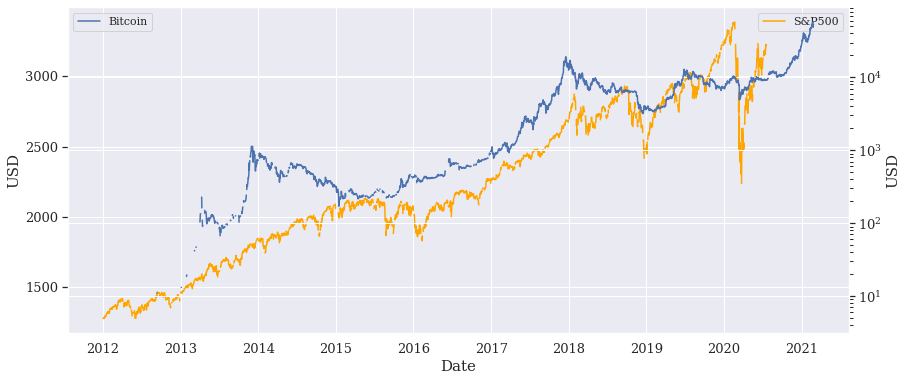

In [27]:
fig_sp, ax1 = plt.subplots(figsize=(14,6))
#sns.lineplot(data=Xday, x="Date", y="SP500", label="S\&P500")
ax1.plot(Xday["Date"], Xday["SP500"], label=r"S&P500", color="orange")
ax1.set(xlabel="Date", ylabel="USD")


ax2 = ax1.twinx()
ax2.plot(Xday["Date"], Xday["Close"], label="Bitcoin")
ax2.set_yscale("log")
ax2.set(ylabel="USD")

ax1.legend()
ax2.legend()

## Savefig
##plt.savefig("BTC_SP500.png", dpi=300)

## 5. Stock-to-Flow
Genesis block produced in "2009-3-1" and thereafter there is a halving event every four years where the amount of Bitcoins being mined is cut by one half its previous cycle.

Bitcoin maximum supply is 21 million and there is no chance in extracting more.

The last Bitoin will be mined in "2140"

In [28]:
## add S2F to our Dataset
## truncate S2F time range so that it matches BTC price
def time_truncate(x, t0=Xday["Date"][Xday.iloc[[0]].index[0]], tf=Xday["Date"][Xday.iloc[[-1]].index[0]]):
    cdate = "Date"
    ii0, ii0_found = 0, False
    iif, iif_found = 0, False
    for ni, i in enumerate(x[cdate]):
        if (ii0_found == False) and (i == t0):
            ii0_found = True
            ii0 = ni
        elif (iif_found == False) and (i == tf):
            iif_found = True
            iif = ni+1
        
        if (ii0 == True) and (iif == True):
            break
    
    df = x.iloc[list(range(ii0,iif))]
    return df.reset_index().drop("index", axis=1)

In [29]:
# load Bitcoin stock from Blockchain.com
totB = pd.read_csv("total-bitcoins")
totB["Timestamp"] = [datetime.strptime(i[:10]+ " 00:00:00", '%Y-%m-%d %H:%M:%S') for i in totB["Timestamp"]]
totB.rename(columns={"Timestamp": "Date", "total-bitcoins": "BTC_stock"}, inplace=True)
#a0 = pad_nan(totB, cc=["Date"])
#totB = time_truncate(totB)
#np.unique(a0)

In [30]:
## dates of genesis and last block
base0 = datetime.strptime("2009-1-3 00:00:00", '%Y-%m-%d %H:%M:%S')
baseF = datetime.strptime("2140-1-3 00:00:00", '%Y-%m-%d %H:%M:%S')

## halving dates 
halv0 = datetime.strptime("2012-11-28 00:00:00", '%Y-%m-%d %H:%M:%S')
halv1 = datetime.strptime("2016-7-9 00:00:00", '%Y-%m-%d %H:%M:%S')
halv2 = datetime.strptime("2020-5-15 00:00:00", '%Y-%m-%d %H:%M:%S')

mhalv = [(halv0 - base0).days, (halv1 - halv0).days, (halv2 - halv1).days]
mhalv = int(round(np.mean(mhalv), 0))  ## mean halving time in days


## create date variable from genesis block to last bitcon creation
s2f_time = [base0]

i = 0
ddd = False
next0 = base0

while ddd == False:
    if (next0 != baseF):
        i += 1
        next0 = base0 + timedelta(days=i)
        s2f_time.append(next0)
    else:
        ddd = True


## compute Bitcoins per block
Bpb = 51.93494777042 ## Bitcoins-per-block mined pre-halving era
BTCp = [] ## Bitcoins produced
BTCf = []  ## yearly flow
min_in_day = 6*24 ## number of 10-minutes in a day
ref_day = base0 ## reference day
hlv = halv0

for b in range(len(s2f_time)):
    ref_day = base0 + timedelta(days=b)
    if (ref_day == hlv):
        Bpb = Bpb/2  ## decrease by one-half
        hlv = hlv + timedelta(days=mhalv)
    BTCp.append(min_in_day*Bpb)
    BTCf.append(min_in_day*365*Bpb)
    

## Bitcoins in stock
BTCstock = np.cumsum(BTCp)
BTCflow = BTCf
BTC_S2F = BTCstock/BTCflow

## convert to dataframe
BTCs = pd.DataFrame({"Date": s2f_time, "BTC_mined": BTCp, "BTC_stock": BTCstock, "BTC_flow": BTCflow, "S2F": BTC_S2F})

<AxesSubplot:xlabel='Date', ylabel='BTC_stock'>

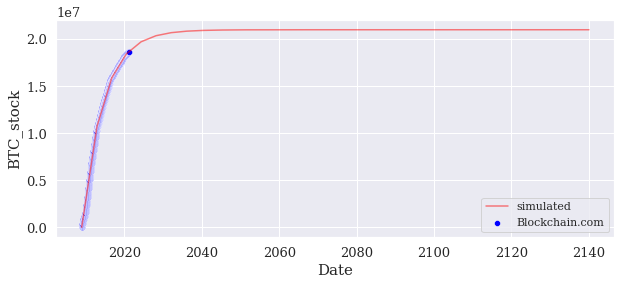

In [31]:
sns.lineplot(data=BTCs, x="Date", y="BTC_stock", color="red", label="simulated", alpha=0.5)
sns.scatterplot(data=totB, x="Date", y="BTC_stock", color="blue", label="Blockchain.com")

[None]

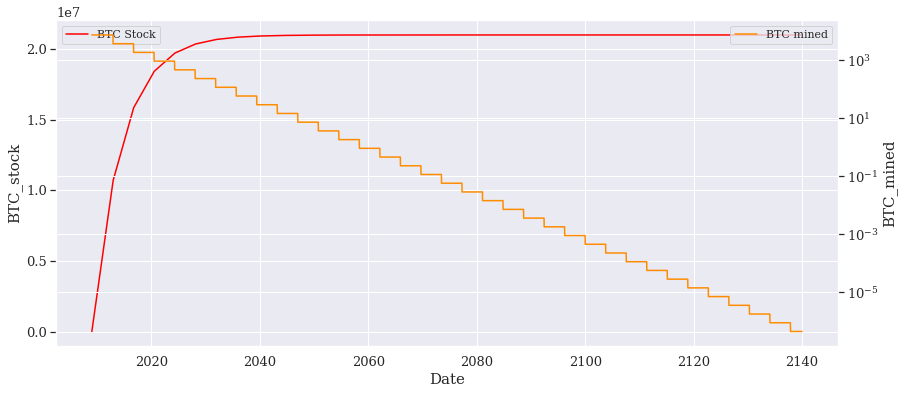

In [32]:
## Bitcoins mined and Bitcoins in stock
fig0, ax1 = plt.subplots(figsize=(14,6))
sns.lineplot(data=BTCs, x="Date", y="BTC_stock", label="BTC Stock", color="red")

ax2 = ax1.twinx()
sns.lineplot(data=BTCs, x="Date", y="BTC_mined", label="BTC mined", color="darkorange")
ax2.set(yscale="log")

## savefig
##plt.savefig("Bitcoin_produced.png", dpi=300)

### Calculation of the S2F model
To compute the Stock-to-Flow for Bitcoin we make use of the simple ratio of the Stock of the asset circulating in the market and the supply

\begin{align*}
\text{SF} = \frac{\text{stock}}{\text{flow}}
\end{align*}

In [33]:
## add S2F to master dataset
BTCs_chopped = time_truncate(BTCs)
Xday[["S2F", "BTC_stock"]] = BTCs_chopped[["S2F", "BTC_stock"]]
Xday.tail()

,Date,Open,High,Low,Close,Volume,Long_Pi,Short_Pi,Percentage,Velocity,Acceleration,V2,A2,SP500,S2F,BTC_stock
3334,2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,6.814546e+10,30325.623534,27822.559626,0.003797,-0.077714,-0.168070,0.006039,0.028247,NaN,54.616438,1.863582e+07
3335,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,5.189759e+10,30593.873131,28204.189621,0.026242,0.022446,0.100160,0.000504,0.010032,NaN,54.619178,1.863675e+07
3336,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,9.205242e+10,30871.890019,28598.433543,-0.057800,-0.084043,-0.106489,0.007063,0.011340,NaN,54.621918,1.863769e+07
3337,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,1.061025e+11,31135.661278,28964.431384,-0.099262,-0.041462,0.042581,0.001719,0.001813,NaN,54.624658,1.863862e+07
3338,2021-02-24,50940.621094,51225.078125,47254.687500,50562.074219,7.704690e+10,31369.280225,29277.752157,-0.007431,0.091831,0.133293,0.008433,0.017767,NaN,54.627397,1.863956e+07


In [34]:
## market cap
Xday["Market_Cap"] = Xday["Close"]*Xday["BTC_stock"]

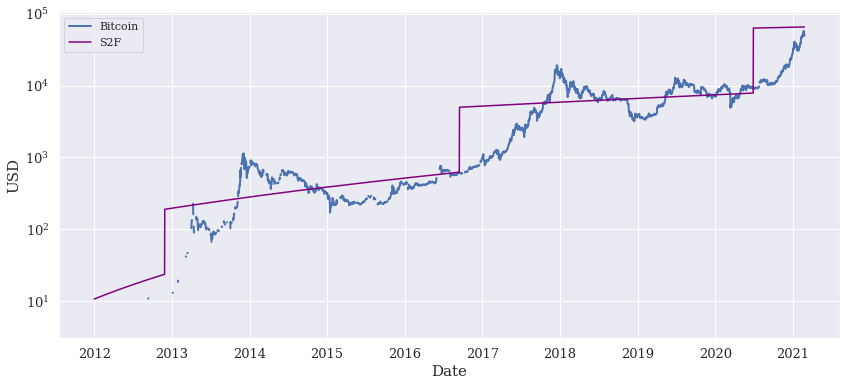

In [35]:
## S2F
fig4, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(Xday["Date"], Xday["Close"], label="Bitcoin", lw=2)


#ax2 = ax1.twinx()
ax1.plot(Xday["Date"]+timedelta(days=0), 0.4*Xday["S2F"]**3, color="purple", label="S2F")
ax1.set(ylabel="USD", xlabel="Date", yscale="log")

ax1.legend()

## save
##plt.savefig("Bitcoin_S2F.png", dpi=300)

[None, None]

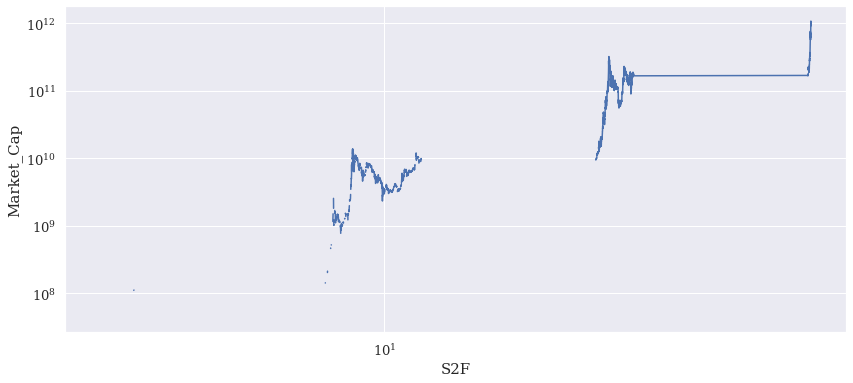

In [36]:
##  plot Market Cap - S2F
fig, axes = plt.subplots(figsize=(14,6))
sns.lineplot(data=Xday, x="S2F", y="Market_Cap", ax=axes)
#sns.lineplot(data=BTCs.iloc[list(range(0,5000))], x="Date", y="S2F", ax=axes)
axes.set(yscale="log", xscale="log")

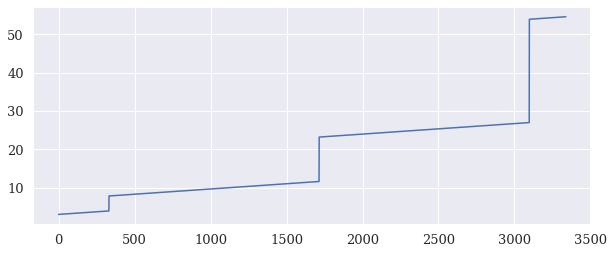

In [37]:
plt.plot(Xday["S2F"])

In [38]:
## Save Master dataset
#Xday.to_csv("BTC.csv")
#BTCs.to_csv("BTC_s2f.csv")

In [39]:
Xday.describe()

,Open,High,Low,Close,Volume,Long_Pi,Short_Pi,Percentage,Velocity,Acceleration,V2,A2,SP500,S2F,BTC_stock,Market_Cap
count,2562.000000,2562.000000,2562.000000,2562.000000,2.562000e+03,2989.000000,3228.000000,2562.000000,2309.000000,2140.000000,2.309000e+03,2.140000e+03,2146.000000,3339.000000,3.339000e+03,2.562000e+03
mean,5223.582617,5262.712110,5180.640007,5230.707390,1.534614e+09,6473.414667,3528.966919,0.000249,-0.000024,0.000049,1.368009e-04,4.252237e-04,2208.099528,18.673980,1.485171e+07,9.250952e+10
std,7009.451938,7185.465128,6811.505043,7042.492973,1.063502e+10,7457.452071,4611.724227,0.008127,0.011699,0.020626,1.599979e-03,4.924116e-03,533.542156,12.886929,2.884853e+06,1.300043e+11
min,4.930000,4.930000,4.930000,4.930000,1.023994e+00,0.527771,0.044414,-0.132877,-0.181561,-0.378367,0.000000e+00,0.000000e+00,1277.060059,2.997260,8.181624e+06,4.357994e+07
25%,442.750000,442.877500,442.647500,442.772500,4.015107e+02,536.231486,196.216914,-0.000361,-0.001042,-0.001974,8.198327e-08,4.921712e-07,1842.522491,9.187671,1.253980e+07,6.359082e+09
50%,3067.535000,3068.370000,3066.220000,3068.350000,4.652569e+03,1014.103543,528.020405,0.000000,0.000000,0.000000,1.029201e-06,3.993236e-06,2103.945069,11.473973,1.566026e+07,5.057059e+10
75%,8236.227500,8250.147500,8233.877500,8250.145000,3.240316e+04,13620.219029,7590.754550,0.000515,0.000983,0.002023,5.326291e-06,1.918386e-05,2694.637391,25.357534,1.730462e+07,1.450158e+11
max,57532.738281,58330.570313,55672.609375,57539.945313,1.233206e+11,31369.280225,29277.752157,0.187972,0.203880,0.322822,4.156698e-02,1.431616e-01,3386.149902,54.627397,1.863956e+07,1.072358e+12


In [40]:
BTCs.describe()

,BTC_mined,BTC_stock,BTC_flow,S2F
count,4.784700e+04,4.784700e+04,4.784700e+04,4.784700e+04
mean,4.388990e+02,2.008505e+07,1.601981e+05,5.983122e+09
std,1.418456e+03,3.026502e+06,5.177365e+05,2.045425e+10
min,4.353137e-07,7.478632e+03,1.588895e-04,2.739726e-03
25%,2.228806e-04,2.094422e+07,8.135142e-02,1.964215e+03
50%,5.705744e-02,2.099986e+07,2.082596e+01,1.008350e+06
75%,2.921341e+01,2.100000e+07,1.066289e+04,2.581393e+08
max,7.478632e+03,2.100000e+07,2.729701e+06,1.321673e+11


In [41]:
## New data blockchain.com
d = pd.read_csv("market-price", header=0)
d["Timestamp"] = [datetime.strptime(i[:10]+ " 00:00:00", '%Y-%m-%d %H:%M:%S') for i in d["Timestamp"]]
d.rename(columns={"Timestamp": "Date", "total-bitcoins": "BTC_stock"}, inplace=True)
d

,Date,market-price
0,2009-01-03,0.00
1,2009-01-06,0.00
2,2009-01-09,0.00
3,2009-01-12,0.00
4,2009-01-15,0.00
...,...,...
1477,2021-02-20,55916.50
1478,2021-02-23,54123.40
1479,2021-02-26,46800.42
1480,2021-03-01,45113.92


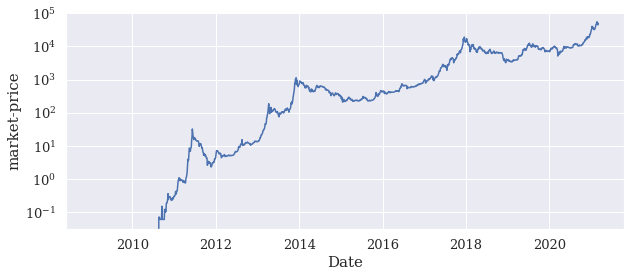

In [42]:
sns.lineplot(data=d, x=d["Date"], y=d["market-price"])
plt.yscale("log")

In [43]:
Xday

,Date,Open,High,Low,Close,Volume,Long_Pi,Short_Pi,Percentage,Velocity,Acceleration,V2,A2,SP500,S2F,BTC_stock,Market_Cap
0,2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.997260,8.181624e+06,NaN
1,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,8.189103e+06,NaN
2,2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.060059,3.002740,8.196581e+06,NaN
3,2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.300049,3.005479,8.204060e+06,NaN
4,2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1281.060059,3.008219,8.211538e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,6.814546e+10,30325.623534,27822.559626,0.003797,-0.077714,-0.168070,0.006039,0.028247,NaN,54.616438,1.863582e+07,1.045460e+12
3335,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,5.189759e+10,30593.873131,28204.189621,0.026242,0.022446,0.100160,0.000504,0.010032,NaN,54.619178,1.863675e+07,1.072358e+12
3336,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,9.205242e+10,30871.890019,28598.433543,-0.057800,-0.084043,-0.106489,0.007063,0.011340,NaN,54.621918,1.863769e+07,1.010299e+12
3337,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,1.061025e+11,31135.661278,28964.431384,-0.099262,-0.041462,0.042581,0.001719,0.001813,NaN,54.624658,1.863862e+07,9.100200e+11
